In [4]:
import numpy as np
import scipy.stats as sps
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = 8, 7
import seaborn as sns
from IPython import display

def plotDist(d, x, ax, title):
    c1 = sns.color_palette()[0]
    c2 = sns.color_palette()[3]
    pdf = ax.bar(x, d.pmf(x), alpha=.6, color=c1, label="PMF / PDF")
    ax1 = ax.twinx()
    ax1.plot(x, d.cdf(x), color=c2)
    cdf = mpl.lines.Line2D([], [], color=c2, label='CMF')
    ax1.set_ylim(0, 1.1)
    ax.legend(handles=[pdf, cdf], loc='best')
    ax.axvline(d.mean(), color='black')
    ax.set_title(title, fontsize='xx-large')
    print(f"variance = {d.var():.2f}")
    print(f"mean     = {d.mean():.2f}")

# Discrete Distributions

## Bernoulli Distribution

A Bernoulli distribution is the distribution of a Bernoulli trial, which is analogous to a coin flip - its outcome is either 1 or 0 (success or failure), base on some probability of success. Its PMF is defined as:

$$
f(x) = \begin{cases}
p^x(1 - p)^{1 - x} & x \in \{0, 1\} \\
0 & otherwise
\end{cases}
$$

where $0 \leq p \leq 1$. Its plot looks like this:

In [6]:
P = .3
plotDist(sps.bernoulli(P), np.array([0, 1]), plt.gca(), f"Bernoulli Distribution: $p = {P}$")

variance = 0.21
mean     = 0.30


### Mean and Variance

The Bernoulli Distribution's mean is:

$$
\mu = E(X) = \sum_{0, 1}{xp^x(1-p)^{1-x}} = p
$$

and the variance is:

$$
\begin{aligned}
\sigma^2 &= E(X^2) - \mu^2 \\
&= \sum_{0, 1}{x^2p^x(1-p)^{1-x}} - p^2 \\
&= p - p^2 \\
&= p(1-p)
\end{aligned}
$$

## Binomial Distribution

The binomial distribution is the probability that describes the number of successes, given $n$ Bernoulli trials with a probability of $p$. It is defined as:

$$
f(x) = \begin{cases}
C^n_xp^x(1-p)^{n-x} & x \in \{0, 1, ..., n\} \\
0 & otherwise
\end{cases}
$$

where $C^n_x$ is the binomial coefficient, which corresponds to the number of combinations of $n$ objects into $k$ classes. The multiplication is needed in order to account for the different permutations of successes/failures.

Its plot looks like this:

variance = 2.10
mean     = 3.00


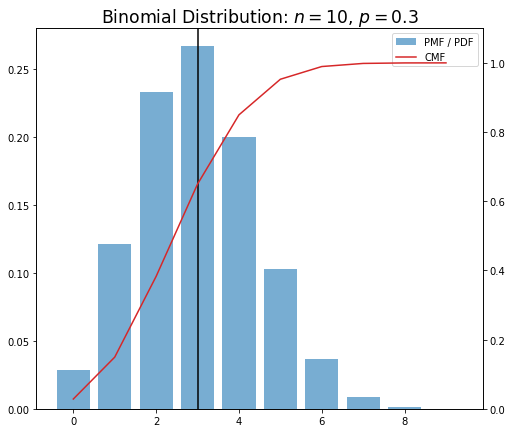

In [7]:
N = 10
P = .3
plotDist(sps.binom(N, P), range(N), plt.gca(), f"Binomial Distribution: $n = {N}$, $p = {P}$")

### Mean and Variance

The mean is derived as:

$$
\begin{aligned}
\mu &= E(X) = \sum_{x\in[0, n]}{x{}C^n_xp^x(1-p)^{n-x}} \\
&= \sum_{x\in[0, n]}{x\frac{n!}{x!(n - x)!}p^x(1-p)^{n - x}} \\
&= np\sum_{x\in[0, n]}{\frac{(n-1)!}{(x-1)!((n - 1) - (x - 1))!}p^{x - 1}(1-p)^{(n-1) - (x-1)}} \\
&= np\sum_{l\in[0, n-1]}{\frac{m!}{l!(m - l)!}p^l(1-p)^{m - l}} \\
&= np(1 - p + p)^n \\
&= np
\end{aligned}
$$

This results in the variance being:

$$
\begin{aligned}
\sigma &= E(X^2) - \mu^2 \\
&= E(X(X - 1)) + E(X) - \mu^2 \\
&= n(n-1)p^2 + np - n^2p^2 \\
&= n^2p^2 - np^2 + np - n^2p^2 \\
&= np(1 - p)
\end{aligned}
$$

## Geometric Distribution

The geometric distribution describes the chance of getting a first successful outcome on the $n$-th Bernoulli trial. In other words, the number of trials needed to get a success form this distribution. This means that in order to get a success on the $n$-th trial, we need $n-1$ failures, which gives us the definition:

$$
f(x) = \begin{cases}
(1-p)^{x-1}p & x\in\mathbb{N} \\
0 & otherwise
\end{cases}
$$

Here is its plot:

variance = 7.78
mean     = 3.33


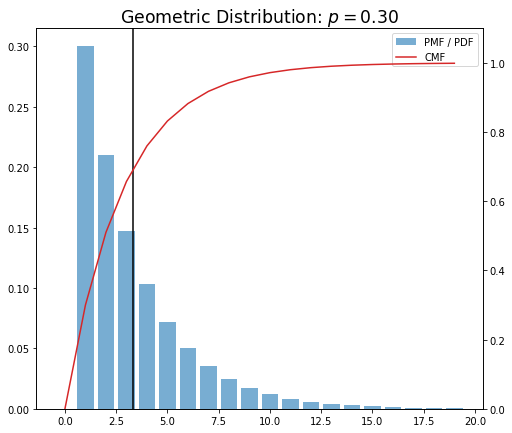

In [8]:
N = 20
P = .3
plotDist(sps.geom(P), range(N), plt.gca(), f"Geometric Distribution: $p = {P:.2f}$")

### Mean and Variance

$$
\begin{aligned}
\mu &= E(X) \\
&= p\sum_x{x(1-p)^{x-1}} \\
&= p\frac{d}{dp}\Big(-\sum_x{(1-p)^x}\Big) \\
&= p\frac{d}{dp}\Big(-\frac{1}{p}\Big) \\
&= p\frac{1}{p^2} \\
&= \frac{1}{p}
\end{aligned}
$$

Note that $\sum_{n = 0}^{\infty}{x^n} = \frac{1}{1 - x}$.

---
$$
\begin{aligned}
\sigma^2 &= E(X^2) - \mu^2 \\
&= p\frac{d}{dp}\Big(-\sum_x{x(1-p)^x}\Big) - \mu^2\\
&= p\frac{d}{dp}\Big(-(1-p)\sum_x{x(1-p)^{x-1}}\Big) - \mu^2 \\
&= p\frac{d}{dp}\Big((1-p)\frac{d}{dp}\sum_x{(1-p)^x}\Big) - \mu^2 \\
&= p\frac{d}{dp}\Big((1-p)\frac{d}{dp}\frac{1}{p}\Big) -\mu^2 \\
&= p\frac{d}{dp}\Big(\frac{p - 1}{p^2}\Big) - \mu^2 \\
&= p\Big(-\frac{1}{p^2} + \frac{2}{p^3}\Big) - \mu^2 \\
&= \frac{2}{p^2} - \frac{1}{p} - \frac{1}{p^2} \\
&= \frac{1}{p^2} - \frac{1}{p} \\
&= \frac{1 - p}{p^2}
\end{aligned}
$$

## Poisson Distribution

The Poisson distribution describes the probability that $x$ number of events occur during an interval, given an average rate of occurrance. We can derive this from the binomial distribution.

The binomial distribution gives us the probability that we succeed $x$ times out of $n$. If we had a number, say $\lambda$, that represented the average number of successes, we could write it as $\lambda = np$ which is the mean of the binomial distribution - namely, the average number of successes given $n$ trials.

However, we actually have infinitely many trials during an interval. So we need to take the limit of the binomial distribution when $n$ tends to infinity.

$$
\begin{aligned}
f(x) &= \lim_{n\to\infty}{C^n_x\Big(\frac{\lambda}{n}\Big)^x(1-\frac{\lambda}{n})^{n-x}} \\
&= \lim_{n\to\infty}{\frac{n!}{x!(n-x)!}\frac{\lambda^x}{n^x}(1-\frac{\lambda}{n})^{n-x}} \\
&= \frac{\lambda^x}{x!}\lim_{n\to\infty}{\frac{n!}{(n-x)!n^x}(1 - \frac{\lambda}{n})^{n-x}} \\
&= \frac{\lambda^x}{x!}\lim_{n\to\infty}{\frac{n(n-1)...(n-x + 1)}{n^x}\frac{(n - \lambda)^{n-x}}{n^{n-x}}} \\
&= \frac{\lambda^x}{x!}\lim_{n\to\infty}{\frac{n}{n}\frac{n-1}{n}...\frac{n-x+1}{n}\Big(\frac{n-\lambda}{n}\Big)^{n-x}} \\
&= \frac{\lambda^x}{x!}\lim_{n\to\infty}\Big(\frac{n-\lambda}{n}\Big)^n\Big(\frac{n-\lambda}{n}\Big)^{-x} \\
&= \frac{\lambda^x}{x!}e^{-\lambda}\lim_{n\to\infty}{\Big(\frac{n-\lambda}{n}\Big)^{-x}} \\
&= \frac{\lambda^x}{x!}e^{-\lambda}
\end{aligned}
$$

And thus we have the Poisson distribution!

$$
f(x) = \begin{cases}
\frac{\lambda^x}{x!}e^{-\lambda} & x\in\mathbb{N}_0 \\
0 & otherwise
\end{cases}
$$

Plotted, it looks like this:

variance = 3.00
mean     = 3.00


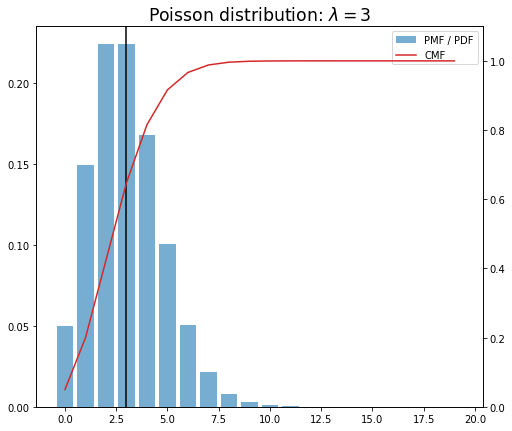

In [9]:
L = 3
N = 20
plotDist(sps.poisson(L), range(N), plt.gca(), f"Poisson distribution: $\lambda = {L:.0f}$")

### Mean and Variance

$$
\begin{aligned}
\mu &= \sum_x{x\frac{\lambda^x}{x!}e^{-\lambda}} \\
&= e^{-\lambda}\sum_x{\frac{\lambda^x}{(x-1)!}} \\
&= \lambda e^{-\lambda}\sum_x{\frac{\lambda^{x-1}}{(x-1)!}} \\
&= \lambda e^{-\lambda}e^\lambda \\
&= \lambda
\end{aligned}
$$

Here we utilize the Taylor expansion of $e^x$:

$$
e^x = \sum_{n=0}^{\infty}{\frac{x^n}{n!}}
$$

---

$$
\begin{aligned}
\sigma^2 &= E(X^2) - \mu^2 \\
&= \lambda e^{-\lambda}\sum_x{x\frac{\lambda^{x-1}}{(x-1)!}} - \mu^2\\
&= \lambda e^{-\lambda}\frac{d}{d\lambda}\Big(\sum_x{\frac{\lambda^x}{(x-1)!}}\Big) - \mu^2 \\
&= \lambda e^{-\lambda}\frac{d}{d\lambda}\Big( \lambda e^\lambda \Big) - \mu^2 \\
&= \lambda e^{-\lambda}(e^\lambda + \lambda e^\lambda) - \mu^2 \\
&= \lambda + \lambda^2 - \lambda^2 \\
&= \lambda
\end{aligned}
$$